In [2]:
import quandl
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [14]:
# Pull US Treasury Yield data from Quandl API
API_KEY = os.getenv('QUANDL_API_KEY')
quandl.ApiConfig.api_key =API_KEY
yield_data = quandl.get("USTREASURY/YIELD")
yield_data.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2022-01-31,0.03,0.13,0.22,0.49,0.78,1.18,1.39,1.62,1.75,1.79,2.17,2.11
2022-02-01,0.04,0.10,0.19,0.48,0.78,1.18,1.39,1.63,1.76,1.81,2.19,2.12
2022-02-02,0.04,0.10,0.19,0.45,0.76,1.16,1.38,1.60,1.74,1.78,2.17,2.11
2022-02-03,0.03,0.15,0.20,0.48,0.78,1.19,1.42,1.66,1.78,1.82,2.20,2.14
2022-02-04,0.05,0.12,0.23,0.56,0.89,1.31,1.55,1.78,1.90,1.93,2.29,2.23


In [4]:
#Select yields to analyze
yield_curve = yield_data[['3 MO','10 YR','20 YR']]

In [15]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve = yield_curve.loc['1990':]
yield_curve.tail()

,3 MO,10 YR,20 YR
Date,,,
2021-09-30,0.04,1.52,2.02
2021-10-31,0.04,1.52,2.02
2021-11-30,0.05,1.43,1.85
2021-12-31,0.06,1.52,1.94
2022-01-31,0.22,1.79,2.17


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

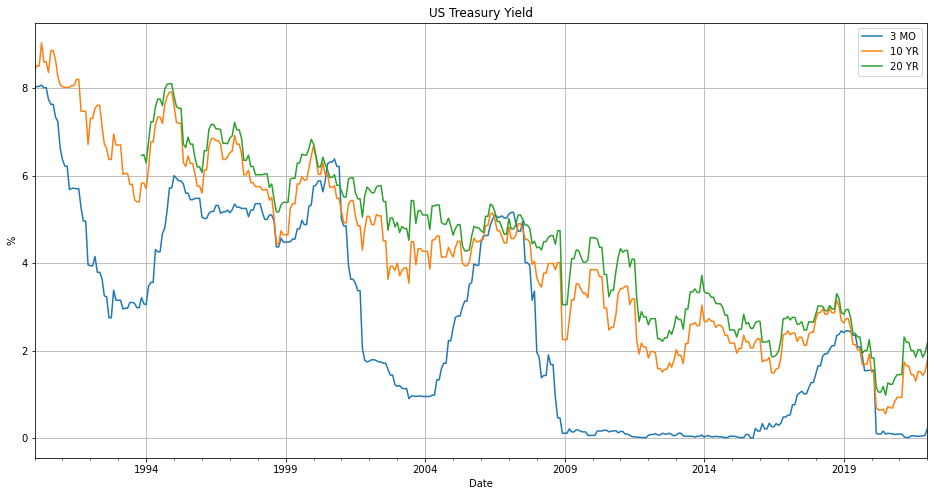

In [16]:
#Plot US Tresury yield curves
yield_curve.plot(figsize = (16,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [17]:
#Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['10 YR'] - yield_curve['3 MO']
long_short_diff.tail()

Date
2021-09-30    1.48
2021-10-31    1.48
2021-11-30    1.38
2021-12-31    1.46
2022-01-31    1.57
Freq: M, dtype: float64

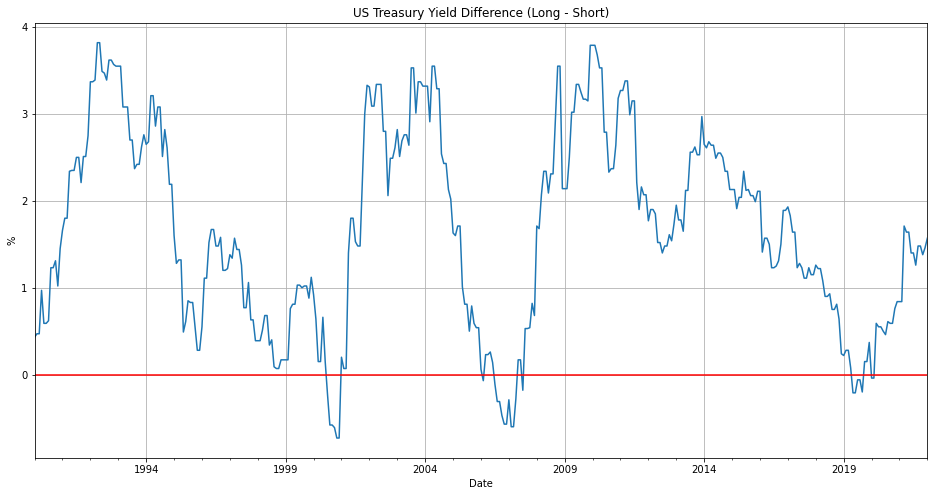

In [18]:
#Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (16,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)
plt.axhline(0, c='r')

In [19]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-02-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [20]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history.tail()

Date
2021-09-30    4307.540039
2021-10-31    4307.540039
2021-11-30    4567.000000
2021-12-31    4766.180176
2022-01-31    4515.549805
Freq: M, Name: Adj Close, dtype: float64

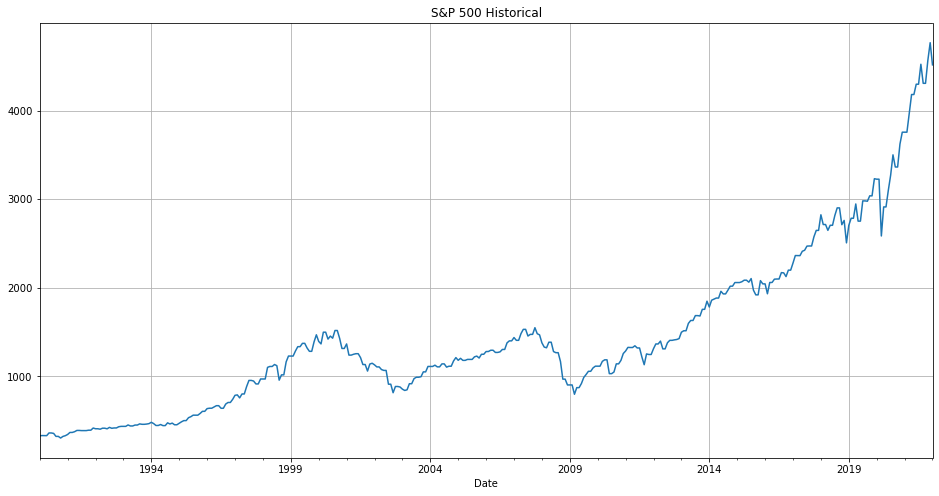

In [21]:
#Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(16,8), title='S&P 500 Historical', grid=True)

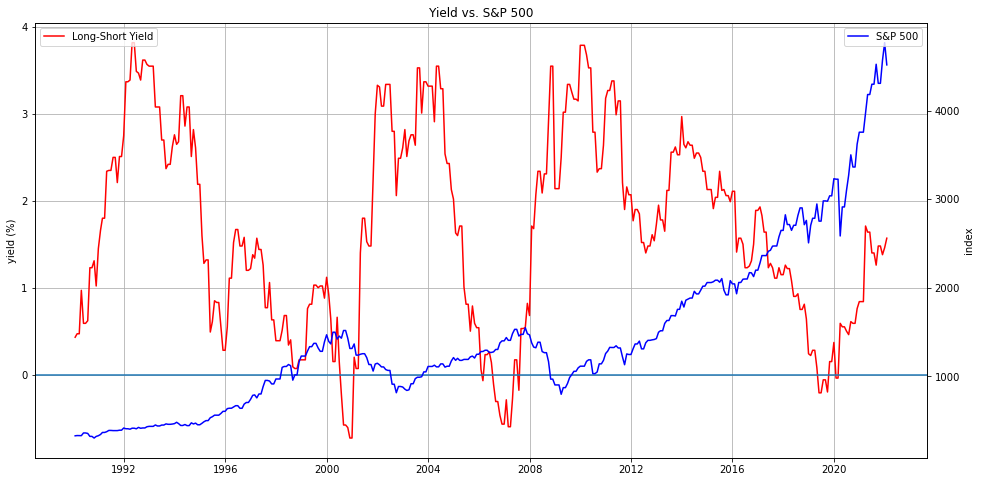

In [22]:
# Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')